In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# to work with rasters
# https://rasterio.readthedocs.io/en/latest/quickstart.html#opening-a-dataset-in-reading-mode
import rasterio
from rasterio.plot import show
from rasterio.features import shapes

import pprint

## SB moist_2_dry raster

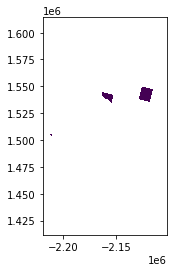

<AxesSubplot:>

In [2]:
# open and plot raster 

rast = rasterio.open('sb_moist_2_dry.tif')
rasterio.plot.show(rast)

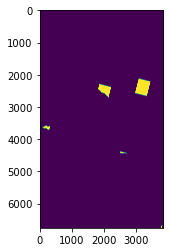

In [3]:
# processing as np.array
img = np.array(rast.read(1))  
img = np.where( img<0, 0, img)
img = np.where( img>0, 1, img)

plt.imshow(img)

In [10]:
# choose connectivity = 8
# https://samirkhanal35.medium.com/relationships-between-pixels-neighbours-and-connectivity-d38e473cd994
shp = shapes(img, connectivity = 8)
print(shp)

<generator object shapes at 0x7f8f787d4970>


In [13]:
k = 0
for shape, value in shp:
    k = k+1
#    print("Image value:")
#    print(value)
#    print("Geometry:")
#    pprint.pprint(shape)
print('# polygons', k) # k = 10 

0

## SAMPLE CODE

https://sgillies.net/2014/01/18/getting-shapes-of-raster-features-with-rasterio.html

In [ ]:


image = numpy.ones((12, 12), dtype=numpy.uint8)
image[0:4,0:4] = 2
image[4:6,0:2] = 5
image

#t = [101985.0, 300.0379266750948, 0.0,
#     2826915.0, 0.0, -300.041782729805]
for shape, value in rasterio.features.shapes(image):#, transform=t):
    print("Image value:")
    print(value)
    print("Geometry:")
    pprint.pprint(shape)

In [25]:
help(rasterio.features.shapes)

Help on function shapes in module rasterio.features:

shapes(source, mask=None, connectivity=4, transform=Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0))
    Get shapes and values of connected regions in a dataset or array.
    
    Parameters
    ----------
    source : array, dataset object, Band, or tuple(dataset, bidx)
        Data type must be one of rasterio.int16, rasterio.int32,
        rasterio.uint8, rasterio.uint16, or rasterio.float32.
    mask : numpy ndarray or rasterio Band object, optional
        Must evaluate to bool (rasterio.bool_ or rasterio.uint8). Values
        of False or 0 will be excluded from feature generation.  Note
        well that this is the inverse sense from Numpy's, where a mask
        value of True indicates invalid data in an array. If `source` is
        a Numpy masked array and `mask` is None, the source's mask will
        be inverted and used in place of `mask`.
    connectivity : int, optional
        Use 4 or 8 pixel connectivity for grouping 

## CA subtropical_2_tropical RASTER



In [22]:
ca_rast = rasterio.open('subtropical_2_tropical.tif')

ca_img = np.array(ca_rast.read(1))  
ca_img = np.where( ca_img<0, 0, ca_img)
ca_img = np.where( ca_img>0, 1, ca_img)
# has 2,998,608 non-zero pixels

ca_shp = shapes(ca_img, connectivity = 8) # 26 shapes

In [23]:
k = 0
for shape, value in ca_shp:
    k = k+1
k

26